In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS = 3
EPOCHS =10

In [ ]:
import os

# Specify the directory path
directory_path = r'C:\Users\admin\Downloads\directory'

# Create the directory
os.makedirs(directory_path, exist_ok=True)


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                              shuffle = True,
                                                              image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                              batch_size= BATCH_SIZE

                                                              )

Found 2122 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, lable_batch in dataset.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


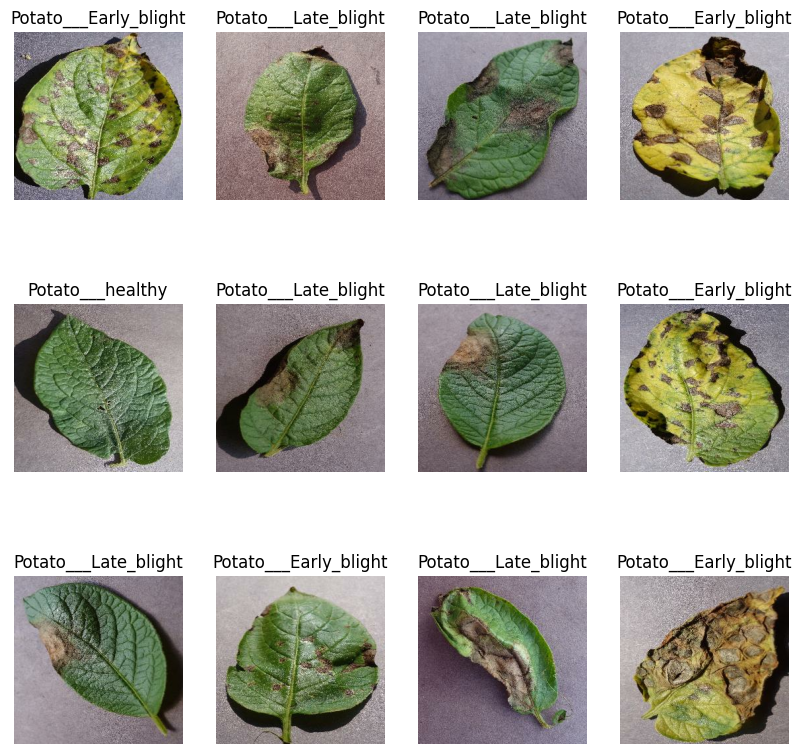

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
  for i in range(12):
    ax= plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[lable_batch[i]])
    plt.axis("off")


In [ ]:
len(dataset)

67

In [ ]:
train_size= 0.8
len(dataset)*train_size

53.6

In [ ]:
train_ds= dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds) #not exactly test_ds it will be further divided in va_ds and test_ds

13

In [ ]:
val_size= 0.1
len(dataset)*val_size

6.7

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

7

In [ ]:
def dataset_partition_tf(train_split = 0.8, val_split= 0.1, test_split = 0.1, shuffle = True, shuffle_size =10000):

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed= 12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  train_ds= ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds


In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
#preprocessing:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
#using CNN:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes= 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),


])
model.build(input_shape= input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']

)

In [ ]:
history =model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 223s 4s/step - loss: 0.9123 - accuracy: 0.4925 - val_loss: 0.8929 - val_accuracy: 0.4844
Epoch 2/10
54/54 [==============================] - 213s 4s/step - loss: 0.6692 - accuracy: 0.6956 - val_loss: 0.4759 - val_accuracy: 0.7969
Epoch 3/10
54/54 [==============================] - 223s 4s/step - loss: 0.3682 - accuracy: 0.8524 - val_loss: 0.2841 - val_accuracy: 0.8854
Epoch 4/10
54/54 [==============================] - 217s 4s/step - loss: 0.2588 - accuracy: 0.8999 - val_loss: 0.2068 - val_accuracy: 0.9219
Epoch 5/10
54/54 [==============================] - 220s 4s/step - loss: 0.1923 - accuracy: 0.9190 - val_loss: 0.2659 - val_accuracy: 0.8958
Epoch 6/10
54/54 [==============================] - 222s 4s/step - loss: 0.1690 - accuracy: 0.9259 - val_loss: 0.1993 - val_accuracy: 0.9010
Epoch 7/10
54/54 [==============================] - 221s 4s/step - loss: 0.1113 - accuracy: 0.9583 - val_loss: 0.1797 - val_accuracy: 0.9167
Epoch 8/10
54

In [ ]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 10s 887ms/step - loss: 0.1216 - accuracy: 0.9455


In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

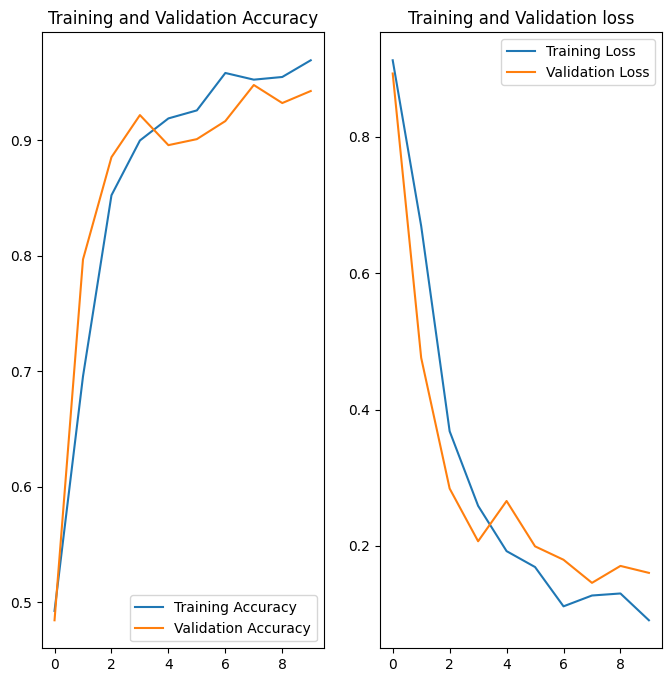

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label= 'Training Loss')
plt.plot(range(EPOCHS),val_loss, label= 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation loss')



frist image to predict
actual lable:  Potato___Early_blight
1/1 [==============================] - 1s 990ms/step
predicted label: Potato___Early_blight


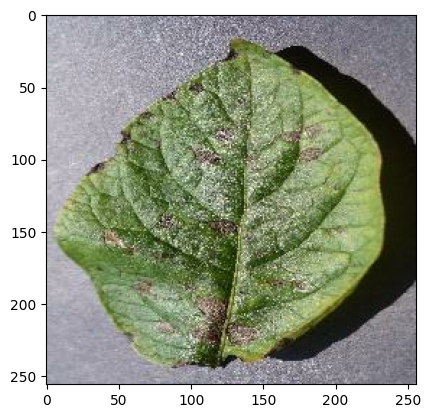

In [ ]:
import numpy as np
for image_batch, lable_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_lable= lable_batch[0].numpy()

  print("frist image to predict")
  plt.imshow(first_image)
  print("actual lable: ", class_names[first_lable])

  batch_prediction= model.predict(image_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):
  img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array= tf.expand_dims(img_array,0)

  predictions= model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


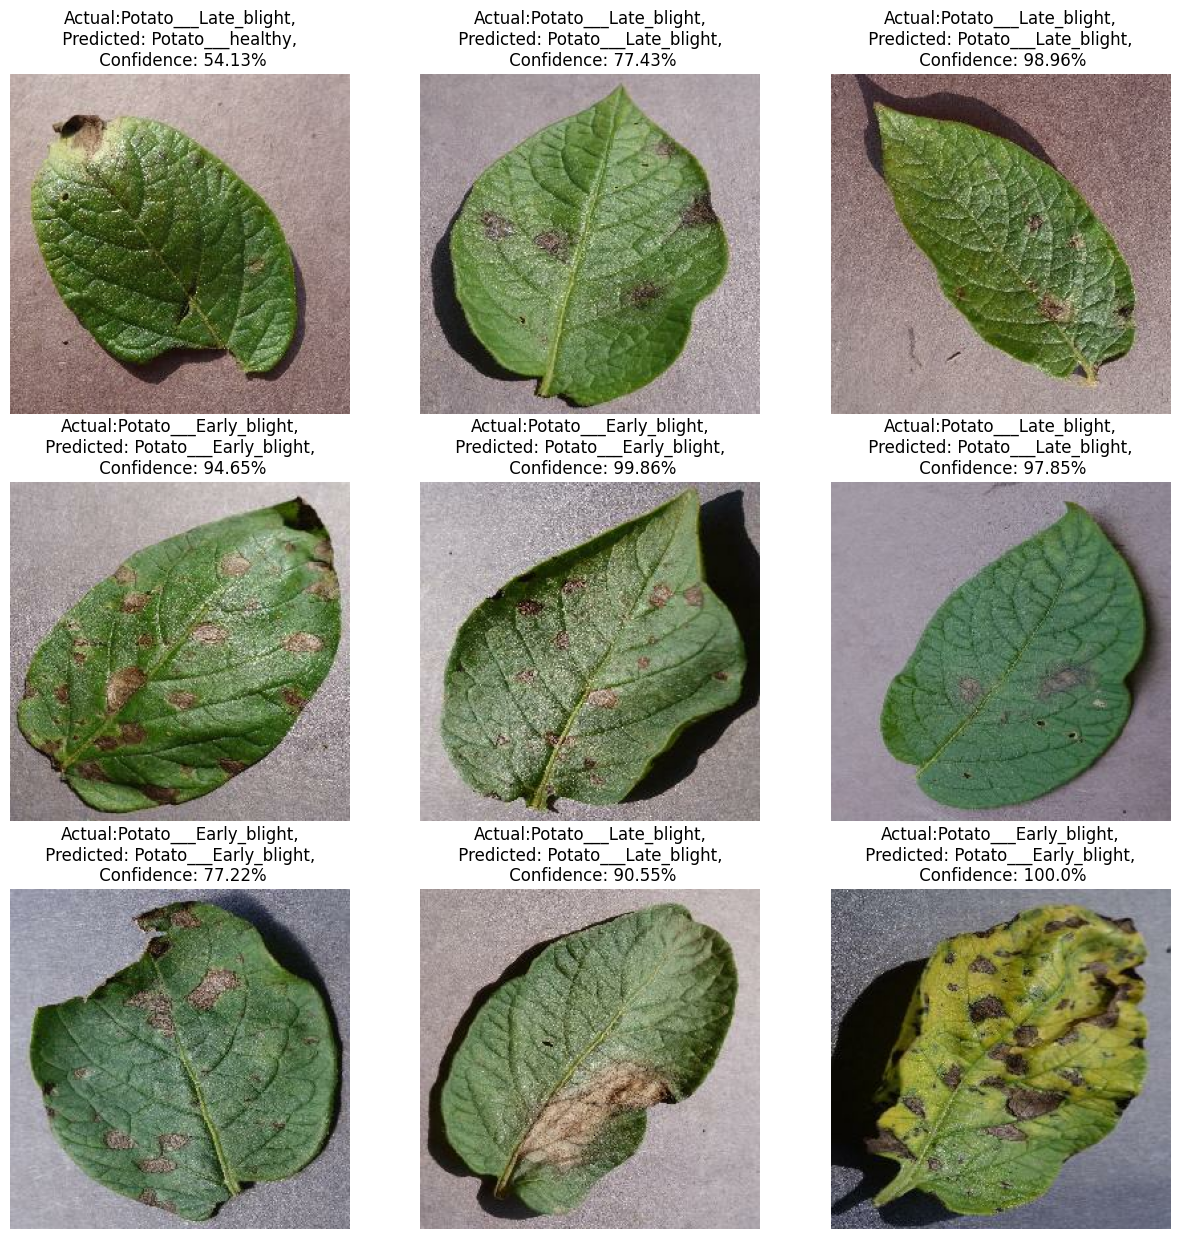

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")


    plt.axis("off")


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to Google Drive
model_version = 1
model.save(f"/https://drive.google.com/drive/folders/19bPexk9QhlcT9FTgaYQufQcTMtlOXbgL?usp=drive_link/{model_version}")

Mounted at /content/drive


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to Google Drive
model_version = 1
model.save("/content/drive/MyDrive/model1/model1")

print(f"Model saved to Google Drive: /content/drive/MyDrive/model1/model1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive: /content/drive/MyDrive/model1/model1


In [ ]:
from google.colab import files

# Save the model to the Colab file system
model_version = 1
model.save(f"/content/models/{model_version}")

# Download the model file
files.download(f"/content/models/{model_version}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp -r /content/PlantVillage/ /content/drive/MyDrive/PlantVillage/
